In [198]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

col_names=['user_id','item_id','rating','timestamp']
data_df=pd.read_csv(r'C:\Users\gsatu\Downloads\ml-100k\ml-100k\u.data',sep='\t',names=col_names)
user_col=['user_id','age','gender','occupation','zip_code']
user_data=pd.read_csv(r'C:\Users\gsatu\Downloads\ml-100k\ml-100k\u.user',sep='\|',names=user_col)
data_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [199]:
user_data.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [200]:
item_df=pd.read_csv(r'C:\Users\gsatu\Downloads\ml-100k\ml-100k\u.item',sep='\|',header=None,encoding='latin-1')
item_df=item_df[[0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
item_df.columns=['item_id','movie_name','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War', 'Western']
item_df


,item_id,movie_name,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
movie_data=pd.merge(data_df,item_df,on='item_id')
movie_data=movie_data.drop(movie_data.columns[3],axis=1)
big_data=pd.merge(movie_data,user_data,on='user_id')
big_data


,user_id,item_id,rating,movie_name,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,Kolya (1996),0,0,0,0,1,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,Men in Black (1997),1,1,0,0,1,0,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,"Truth About Cats & Dogs, The (1996)",0,0,0,0,1,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,"Birdcage, The (1996)",0,0,0,0,1,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,Titanic (1997),1,0,0,0,0,0,...,0,1,0,0,0,0,48,F,administrator,33763
99996,873,326,4,G.I. Jane (1997),1,0,0,0,0,0,...,0,0,0,0,1,0,48,F,administrator,33763
99997,873,348,3,Desperate Measures (1998),0,0,0,0,0,1,...,0,0,0,1,0,0,48,F,administrator,33763
99998,873,358,2,Spawn (1997),1,1,0,0,0,0,...,0,0,1,1,0,0,48,F,administrator,33763


In [202]:
rating_data=pd.DataFrame(movie_data.groupby('movie_name').mean()['rating'])
rating_data

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [203]:
# select the column to multiply
col_to_multiply = 'rating'

# select the columns to multiply with
cols_to_multiply_with = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War', 'Western']

# multiply the columns
big_data[cols_to_multiply_with] = big_data[cols_to_multiply_with].multiply(big_data[col_to_multiply], axis=0)
big_data

,user_id,item_id,rating,movie_name,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,Kolya (1996),0,0,0,0,3,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,Men in Black (1997),2,2,0,0,2,0,...,0,0,2,0,0,0,49,M,writer,55105
2,196,111,4,"Truth About Cats & Dogs, The (1996)",0,0,0,0,4,0,...,0,4,0,0,0,0,49,M,writer,55105
3,196,25,4,"Birdcage, The (1996)",0,0,0,0,4,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,4,0,...,0,0,0,0,0,0,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,Titanic (1997),5,0,0,0,0,0,...,0,5,0,0,0,0,48,F,administrator,33763
99996,873,326,4,G.I. Jane (1997),4,0,0,0,0,0,...,0,0,0,0,4,0,48,F,administrator,33763
99997,873,348,3,Desperate Measures (1998),0,0,0,0,0,3,...,0,0,0,3,0,0,48,F,administrator,33763
99998,873,358,2,Spawn (1997),2,2,0,0,0,0,...,0,0,2,2,0,0,48,F,administrator,33763


In [204]:
rating_data['rated_by']=pd.DataFrame(movie_data.groupby('movie_name').count()['rating'])
rating_data.sort_values(by='rating',ascending=False)
rating_data



,rating,rated_by
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [205]:
user_genere_data = big_data.groupby('user_id')[big_data.columns[3:22]].mean()
user_genere_data


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,,,,,,,,,,,,,,,,,,
1,0.919118,0.452206,0.147059,0.202206,1.161765,0.316176,0.088235,1.544118,0.025735,0.018382,0.165441,0.139706,0.066176,0.636029,0.632353,0.691176,0.338235,0.080882
2,0.612903,0.209677,0.064516,0.193548,0.983871,0.548387,0.000000,2.161290,0.048387,0.145161,0.096774,0.048387,0.225806,1.064516,0.241935,0.693548,0.177419,0.000000
3,0.722222,0.259259,0.000000,0.000000,0.574074,0.555556,0.092593,1.185185,0.000000,0.092593,0.222222,0.074074,0.648148,0.314815,0.407407,0.981481,0.259259,0.000000
4,1.291667,0.583333,0.000000,0.000000,0.833333,0.791667,0.208333,1.125000,0.000000,0.000000,0.166667,0.208333,0.833333,0.541667,0.958333,1.791667,0.375000,0.000000
5,1.005714,0.611429,0.302857,0.405714,1.405714,0.200000,0.000000,0.411429,0.028571,0.028571,0.405714,0.228571,0.051429,0.251429,0.662857,0.320000,0.257143,0.028571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.489796,0.714286,0.081633,0.081633,1.387755,0.265306,0.000000,1.673469,0.081633,0.000000,0.061224,0.081633,0.081633,0.979592,0.673469,1.000000,0.306122,0.000000
940,0.738318,0.336449,0.084112,0.196262,1.383178,0.280374,0.000000,1.616822,0.000000,0.112150,0.112150,0.205607,0.121495,0.794393,0.542056,0.626168,0.457944,0.000000
941,1.727273,1.227273,0.636364,0.409091,1.318182,0.136364,0.000000,0.954545,0.000000,0.000000,0.000000,0.181818,0.227273,0.227273,1.409091,1.272727,0.227273,0.000000


In [206]:
#collect top 10 genere of the user then look for movies that fall into that category 
user_genere_data['user_id'] = user_genere_data.reset_index().index
user_genere_data.set_index('user_id', inplace=True)
top_10_user_genere_data = user_genere_data.apply(lambda x: x.nlargest(10), axis=1)
top_10_user_genere_data=top_10_user_genere_data.fillna(0)
top_10_user_genere_data

#movie likability score for a user




#once finished gathering movie list from genere and correaltion from movie matrix take union of both list



,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,,,,,,,,,,,,,,,,,,
0,0.919118,0.452206,0.000000,0.202206,1.161765,0.316176,0.0,1.544118,0.0,0.0,0.000000,0.000000,0.000000,0.636029,0.632353,0.691176,0.338235,0.0
1,0.612903,0.209677,0.000000,0.193548,0.983871,0.548387,0.0,2.161290,0.0,0.0,0.000000,0.000000,0.225806,1.064516,0.241935,0.693548,0.000000,0.0
2,0.722222,0.259259,0.000000,0.000000,0.574074,0.555556,0.0,1.185185,0.0,0.0,0.000000,0.000000,0.648148,0.314815,0.407407,0.981481,0.259259,0.0
3,1.291667,0.583333,0.000000,0.000000,0.833333,0.791667,0.0,1.125000,0.0,0.0,0.000000,0.000000,0.833333,0.541667,0.958333,1.791667,0.375000,0.0
4,1.005714,0.611429,0.302857,0.405714,1.405714,0.000000,0.0,0.411429,0.0,0.0,0.405714,0.000000,0.000000,0.000000,0.662857,0.320000,0.257143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.489796,0.714286,0.081633,0.000000,1.387755,0.265306,0.0,1.673469,0.0,0.0,0.000000,0.000000,0.000000,0.979592,0.673469,1.000000,0.306122,0.0
939,0.738318,0.336449,0.000000,0.000000,1.383178,0.280374,0.0,1.616822,0.0,0.0,0.000000,0.205607,0.000000,0.794393,0.542056,0.626168,0.457944,0.0
940,1.727273,1.227273,0.636364,0.409091,1.318182,0.000000,0.0,0.954545,0.0,0.0,0.000000,0.000000,0.227273,0.227273,1.409091,1.272727,0.000000,0.0


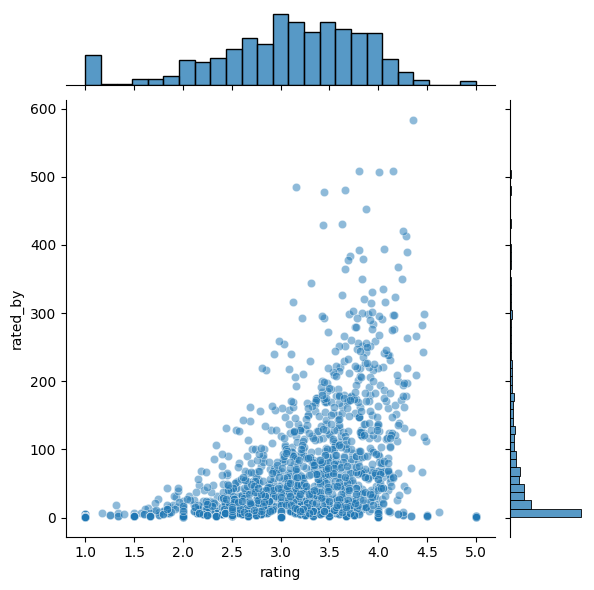

In [209]:
import seaborn as sns

sns.jointplot(x='rating',y='rated_by',alpha=0.5,data=rating_data)

In [210]:
#create a movie matrix
movie_mat = big_data.pivot_table(index="user_id",columns="movie_name",values="rating")
movie_mat

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
def predict_movies(movie_name):
    #first part of recommendation
    movie_user_ratings = movie_mat[movie_name]
    similar_to_movies = movie_mat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movies, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(rating_data['rated_by'])
    predictions = corr_movie[corr_movie['rated_by']>100].sort_values('Correlation',ascending=False)
    predictions=predictions.reset_index(drop=False)
    ans1=predictions['movie_name'].tolist()[0:10]
    
    # part 2 of recomendaton
    #get the user who gave maximum rating to the movie
    uid=movie_mat[movie_name].dropna().idxmax()


    new_big_data=big_data.iloc[:,4:22]
    new_big_data=new_big_data.sample(frac=1)
    store=set()
    cnt=0
    for index,row in new_big_data.iterrows():
        val=0
        cnt+=1
        for i in range(18):
                # here we will give the user id
                val+=top_10_user_genere_data.iloc[uid][i]*new_big_data.iloc[index][i]
        
        store.add((big_data.iloc[index][3],val))
        if(cnt==7000):
                break


    final_list=sorted(store, key=lambda x: x[1],reverse=True)
    ans2=[tup[0] for tup in final_list[0:10]]
    ans=set(ans1).union(ans2)

    
    return ans

movie=predict_movies('Titanic (1997)')

movie